# Flight Price Prediction Model

# Instructions:-

1) You will have the dataset.
2) Find the cheapest and most expensive flight at a specific time.
3) You will have to go through EDA.
4) Train ML Model.
5) Find a sweet spot for a cheap ticket.

# Dataset X includes the following features
- f1: Ticket Purchase Date Time
- f2: Origin
- f3: Destination
- f4: Departure Date Time
- f5: Arrival Date Time
- f6: Airline
- f7: Refundable Ticket
- f8: Baggage Weight
- f9: Baggage Pieces
- f10: Flight Number
    
# Dataset Y will have the following variables
- Target

# 1) Exploratory Data Analysis:-

We will extract information from our data

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Load your data

train = pd.read_csv("sastaticket_train.csv")
test = pd.read_csv("sastaticket_test.csv")

In [3]:
df = train
df.head()

,Unnamed: 0.2,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.1,target
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


In [4]:
df_test = test
df_test.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,2694449,2021-09-16 12:20:01.578279+00:00,x,y,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1,d-1
1,3088556,2021-09-18 20:13:13.612131+00:00,x,y,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1,d-5
2,3914899,2021-09-24 17:53:41.424953+00:00,x,y,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1,a-9
3,1139859,2021-09-07 19:39:07.182848+00:00,x,y,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0,b-1
4,594648,2021-09-05 03:48:20.099555+00:00,x,y,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1,a-1


In [5]:
X_train_df = train
y_train_df = train

In [6]:
X_train_df = X_train_df.drop(["Unnamed: 0.2" , "Unnamed: 0" , "Unnamed: 0.1" , "target"] , axis=1)
X_train_df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2
1,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9
2,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4
3,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23
4,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1


In [7]:
y_train_df = y_train_df.drop(["Unnamed: 0.2" , "Unnamed: 0" , "Unnamed: 0.1" , "target"] , axis=1)
y_train_df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2
1,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9
2,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4
3,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23
4,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1


In [8]:
# Structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.2  5000 non-null   int64  
 1   Unnamed: 0    5000 non-null   int64  
 2   f1            5000 non-null   object 
 3   f2            5000 non-null   object 
 4   f3            5000 non-null   object 
 5   f4            5000 non-null   object 
 6   f5            5000 non-null   object 
 7   f6            5000 non-null   object 
 8   f7            5000 non-null   bool   
 9   f8            5000 non-null   float64
 10  f9            5000 non-null   int64  
 11  f10           5000 non-null   object 
 12  Unnamed: 0.1  5000 non-null   int64  
 13  target        5000 non-null   float64
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 512.8+ KB


In [9]:
# Check null values

df.isnull().sum()

Unnamed: 0.2    0
Unnamed: 0      0
f1              0
f2              0
f3              0
f4              0
f5              0
f6              0
f7              0
f8              0
f9              0
f10             0
Unnamed: 0.1    0
target          0
dtype: int64

In [10]:
# Get summary statistics of the data

df.describe()

,Unnamed: 0.2,Unnamed: 0,f8,f9,Unnamed: 0.1,target
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,1.086293e+07,1.086293e+07,22.494400,0.944600,1.086293e+07,10104.351800
std,6.275456e+06,6.275456e+06,8.887101,0.607951,6.275456e+06,3359.936118
min,2.499000e+03,2.499000e+03,0.000000,0.000000,2.499000e+03,4990.000000
25%,5.417290e+06,5.417290e+06,20.000000,1.000000,5.417290e+06,7796.000000
50%,1.093803e+07,1.093803e+07,20.000000,1.000000,1.093803e+07,9403.000000
75%,1.621582e+07,1.621582e+07,32.000000,1.000000,1.621582e+07,11245.000000
max,2.177443e+07,2.177443e+07,45.000000,2.000000,2.177443e+07,33720.000000


In [11]:
# Understanding the data

df.head()

,Unnamed: 0.2,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.1,target
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


In [12]:
#Getting columns names

print(df.columns)

Index(['Unnamed: 0.2', 'Unnamed: 0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7',
       'f8', 'f9', 'f10', 'Unnamed: 0.1', 'target'],
      dtype='object')


In [13]:
# Finding unique values in categorical lists

cat_list = ["f2" , "f3" , "f6" , "f8" , "f9" , "f10"]

for i in cat_list:
    print(i , df[i].unique())

f2 ['x']
f3 ['y']
f6 ['gamma' 'alpha' 'beta' 'omega']
f8 [ 0. 35. 20. 15. 32. 40. 45.]
f9 [0 1 2]
f10 ['c-2' 'a-9' 'c-4' 'a-23' 'b-1' 'a-5' 'b-9' 'a-7' 'd-1' 'c-6' 'a-1' 'd-5'
 'b-69' 'b-19' 'd-3' 'b-319' 'b-369' 'b-67' 'b-73']


In [14]:
# We will find the ticket price based on f6 (Airline Name) , f8 (Baggage Weight) and f9 (Baggage Pieces)

df.drop(['Unnamed: 0.2', 'Unnamed: 0', 'f2', 'f3', 'f10', 'Unnamed: 0.1'], axis=1, inplace=True)
df_test.drop(['Unnamed: 0', 'f2', 'f3', 'f10'], axis=1, inplace=True)

In [15]:
df.head()

,f1,f4,f5,f6,f7,f8,f9,target
0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


In [16]:
df_test.head()

,f1,f4,f5,f6,f7,f8,f9
0,2021-09-16 12:20:01.578279+00:00,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1
1,2021-09-18 20:13:13.612131+00:00,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1
2,2021-09-24 17:53:41.424953+00:00,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1
3,2021-09-07 19:39:07.182848+00:00,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0
4,2021-09-05 03:48:20.099555+00:00,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1


In [17]:
# Now we will split date and time separately

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      5000 non-null   object 
 1   f4      5000 non-null   object 
 2   f5      5000 non-null   object 
 3   f6      5000 non-null   object 
 4   f7      5000 non-null   bool   
 5   f8      5000 non-null   float64
 6   f9      5000 non-null   int64  
 7   target  5000 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 278.4+ KB


In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      250 non-null    object 
 1   f4      250 non-null    object 
 2   f5      250 non-null    object 
 3   f6      250 non-null    object 
 4   f7      250 non-null    bool   
 5   f8      250 non-null    float64
 6   f9      250 non-null    int64  
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 12.1+ KB


In [20]:
# Will do typecasting

df["f1"] = pd.to_datetime(df["f1"])
df["f4"] = pd.to_datetime(df["f4"])
df["f5"] = pd.to_datetime(df["f5"])

df_test["f1"] = pd.to_datetime(df_test["f1"])
df_test["f4"] = pd.to_datetime(df_test["f4"])
df_test["f5"] = pd.to_datetime(df_test["f5"])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      5000 non-null   datetime64[ns, UTC]
 1   f4      5000 non-null   datetime64[ns, UTC]
 2   f5      5000 non-null   datetime64[ns, UTC]
 3   f6      5000 non-null   object             
 4   f7      5000 non-null   bool               
 5   f8      5000 non-null   float64            
 6   f9      5000 non-null   int64              
 7   target  5000 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](3), float64(2), int64(1), object(1)
memory usage: 278.4+ KB


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      250 non-null    datetime64[ns, UTC]
 1   f4      250 non-null    datetime64[ns, UTC]
 2   f5      250 non-null    datetime64[ns, UTC]
 3   f6      250 non-null    object             
 4   f7      250 non-null    bool               
 5   f8      250 non-null    float64            
 6   f9      250 non-null    int64              
dtypes: bool(1), datetime64[ns, UTC](3), float64(1), int64(1), object(1)
memory usage: 12.1+ KB


In [23]:
# Adding column after subtraction to find time before departure

df.insert(0 , "time_to_depart(s)" , ((df["f4"] - df["f1"]).astype("timedelta64[s]")) , True)
df.insert(1 , "time_travel(s)" , ((df["f5"] - df["f4"]).astype("timedelta64[s]")) , True)

df_test.insert(0 , "time_to_depart(s)" , ((df_test["f4"] - df_test["f1"]).astype("timedelta64[s]")) , True)
df_test.insert(1 , "time_travel(s)" , ((df_test["f5"] - df_test["f4"]).astype("timedelta64[s]")) , True)

In [24]:
df.head()

,time_to_depart(s),time_travel(s),f1,f4,f5,f6,f7,f8,f9,target
0,1268192.0,7200.0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,29688.0,7200.0,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,3033072.0,7200.0,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,363011.0,7200.0,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2142368.0,6900.0,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


In [25]:
df_test.head()

,time_to_depart(s),time_travel(s),f1,f4,f5,f6,f7,f8,f9
0,1441198.0,7200.0,2021-09-16 12:20:01.578279+00:00,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1
1,420706.0,7200.0,2021-09-18 20:13:13.612131+00:00,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1
2,4043178.0,7200.0,2021-09-24 17:53:41.424953+00:00,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1
3,465652.0,6900.0,2021-09-07 19:39:07.182848+00:00,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0
4,1469499.0,7200.0,2021-09-05 03:48:20.099555+00:00,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1


In [26]:
df.isnull().sum()

time_to_depart(s)    0
time_travel(s)       0
f1                   0
f4                   0
f5                   0
f6                   0
f7                   0
f8                   0
f9                   0
target               0
dtype: int64

In [27]:
# Separating categorical columns

cats_cols = ["f6" , "f7" , "f8" , "f9"]
num_cols = ["time_to_depart(s)" , "time_travel(s)"]

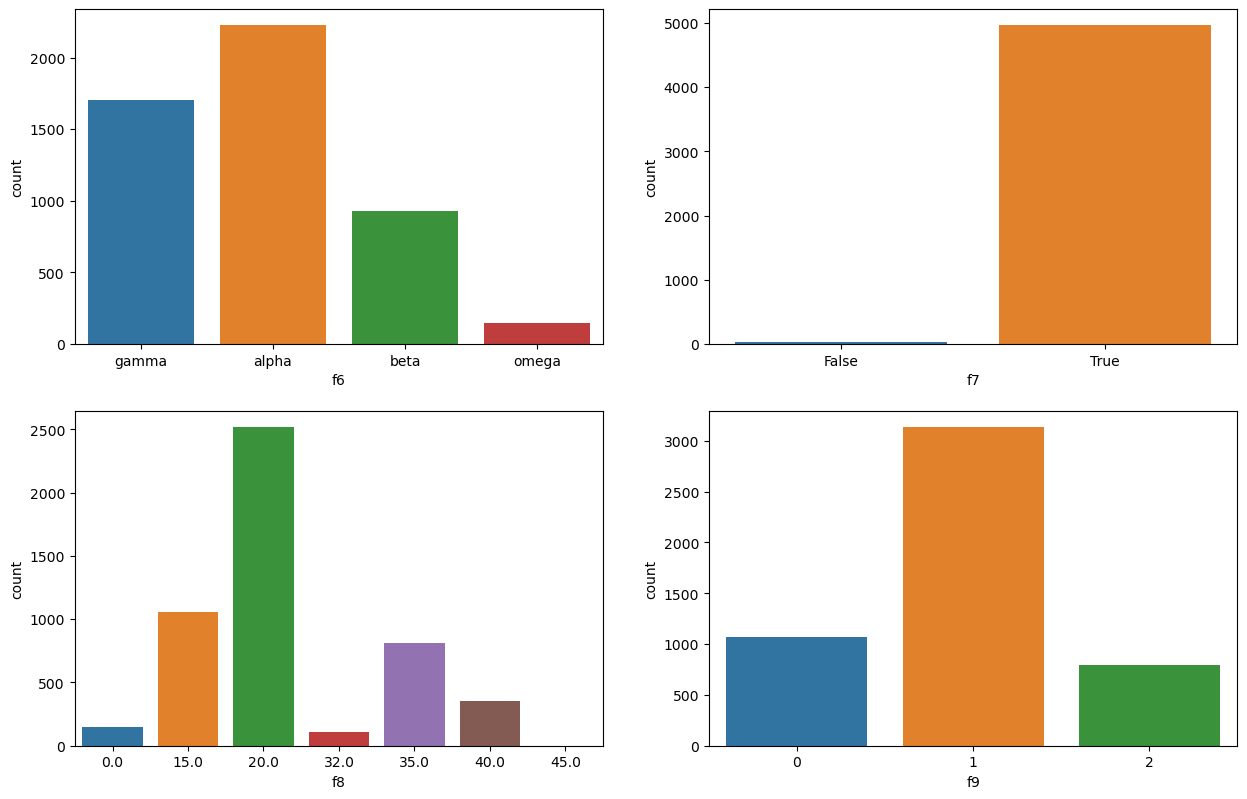

In [28]:
# Plotting categorical columns

c = 1
plt.figure(figsize=(15,20))

for i in cats_cols:
    plt.subplot(4, 2, c)
    sns.countplot(x=df[i])
    c = c + 1
    
plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_5280\2961181608.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\muham\AppData\Local\Temp\ipykernel_5280\2961181608.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


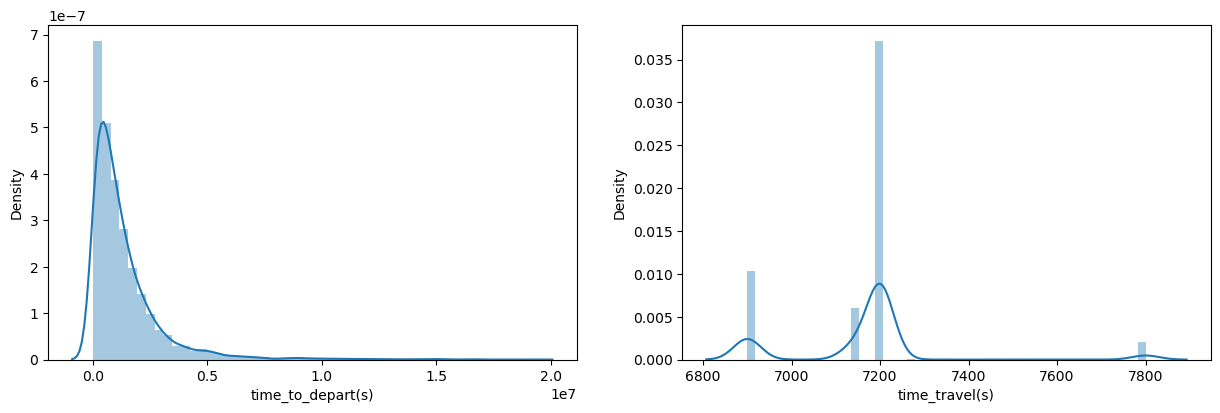

In [29]:
# Plotting numerical columns

c = 1
plt.figure(figsize=(15,20))

for i in num_cols:
    plt.subplot(4, 2, c)
    sns.distplot(df[i])
    c = c + 1
    
plt.show()

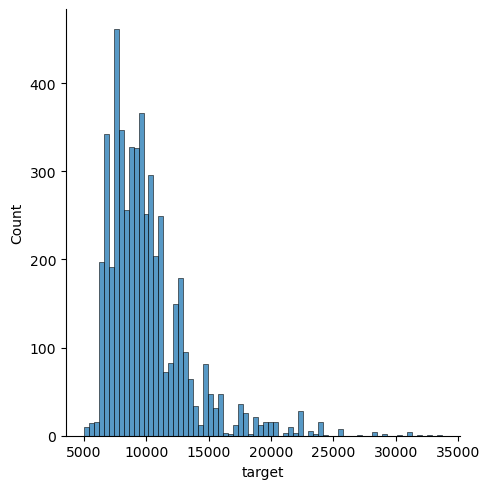

In [30]:
# Plotting the target column

sns.displot(df.target)

<Axes: >

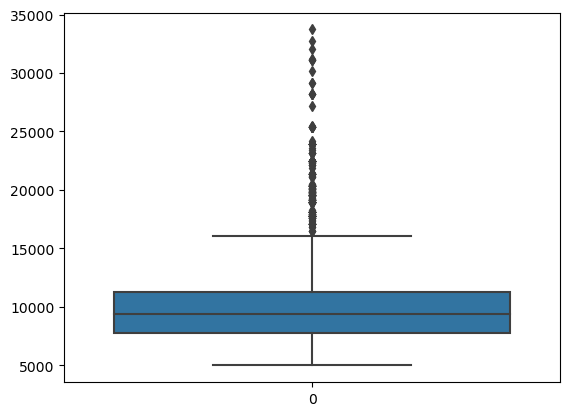

In [31]:
sns.boxplot(df["target"])

In [32]:
 # Check Skew
    
df.skew()

C:\Users\muham\AppData\Local\Temp\ipykernel_5280\4288737552.py:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


time_to_depart(s)     3.703644
time_travel(s)        1.319374
f7                  -11.660949
f8                    0.418300
f9                    0.027547
target                2.056345
dtype: float64

In [33]:
# Check Kurtosis

df.kurtosis()

C:\Users\muham\AppData\Local\Temp\ipykernel_5280\3361757656.py:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


time_to_depart(s)     20.796049
time_travel(s)         5.504109
f7                   134.031335
f8                     0.046374
f9                    -0.310364
target                 6.344666
dtype: float64

# 2) Encoding of variables

In [34]:
df.drop(["f1" , "f4" , "f5"] , axis=1 , inplace=True)
df_test.drop(["f1" , "f4" , "f5"] , axis=1 , inplace=True)

In [35]:
df.head()

,time_to_depart(s),time_travel(s),f6,f7,f8,f9,target
0,1268192.0,7200.0,gamma,True,0.0,0,7400.0
1,29688.0,7200.0,alpha,True,35.0,1,15377.0
2,3033072.0,7200.0,gamma,True,20.0,1,6900.0
3,363011.0,7200.0,alpha,True,15.0,1,9707.0
4,2142368.0,6900.0,beta,True,20.0,0,6500.0


In [36]:
# Encoding

le = LabelEncoder()

df["f6"] = le.fit_transform(df["f6"])
df["f7"] = le.fit_transform(df["f7"])
df["f8"] = le.fit_transform(df["f8"])

df_test["f6"] = le.fit_transform(df_test["f6"])
df_test["f7"] = le.fit_transform(df_test["f7"])
df_test["f8"] = le.fit_transform(df_test["f8"])

In [37]:
df.sample(10)

,time_to_depart(s),time_travel(s),f6,f7,f8,f9,target
3163,1317988.0,7140.0,2,1,2,2,11900.0
668,1705075.0,7200.0,2,1,2,2,14000.0
1976,408962.0,7200.0,0,1,2,1,10545.0
4597,402468.0,7200.0,0,1,2,1,10545.0
3342,101098.0,7200.0,0,1,4,1,13277.0
2549,332681.0,6900.0,1,1,2,0,7458.0
377,320911.0,7200.0,2,1,2,1,8750.0
3643,2181824.0,7200.0,2,1,3,2,10655.0
1370,7609835.0,7200.0,2,1,2,2,13560.0
4832,676423.0,7200.0,0,1,1,1,6810.0


In [38]:
df_test.sample(10)

,time_to_depart(s),time_travel(s),f6,f7,f8,f9
198,1160731.0,7200.0,3,0,1,1
215,4916436.0,6900.0,1,0,2,0
79,80485.0,7200.0,2,0,1,2
109,1327903.0,7200.0,0,0,0,1
177,1092853.0,7200.0,3,0,1,1
204,1243921.0,7140.0,2,0,1,2
24,281144.0,7200.0,2,0,1,1
49,1536631.0,7200.0,0,0,1,1
245,346286.0,7200.0,0,0,0,1
169,589496.0,6900.0,1,0,1,0


In [39]:
df.describe()

,time_to_depart(s),time_travel(s),f6,f7,f8,f9,target
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.349212e+06,7159.836000,0.953400,0.992800,2.292000,0.944600,10104.351800
std,1.679384e+06,169.613345,0.948371,0.084555,1.247817,0.607951,3359.936118
min,2.003000e+03,6900.000000,0.000000,0.000000,0.000000,0.000000,4990.000000
25%,3.606870e+05,7140.000000,0.000000,1.000000,2.000000,1.000000,7796.000000
50%,8.634945e+05,7200.000000,1.000000,1.000000,2.000000,1.000000,9403.000000
75%,1.698816e+06,7200.000000,2.000000,1.000000,3.000000,1.000000,11245.000000
max,1.916464e+07,7800.000000,3.000000,1.000000,6.000000,2.000000,33720.000000


In [40]:
# Splitting our data into x and y

X = df.drop(["target"] , axis=True)
y = df["target"]

In [41]:
X.head()

,time_to_depart(s),time_travel(s),f6,f7,f8,f9
0,1268192.0,7200.0,2,1,0,0
1,29688.0,7200.0,0,1,4,1
2,3033072.0,7200.0,2,1,2,1
3,363011.0,7200.0,0,1,1,1
4,2142368.0,6900.0,1,1,2,0


In [42]:
y.head()

0     7400.0
1    15377.0
2     6900.0
3     9707.0
4     6500.0
Name: target, dtype: float64

# 3) ML Modelling

In [43]:
# Regression Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [44]:
# Shorten the names

lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()

In [45]:
# Model Loop

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for i in [lr, dt, svr, knn]:
    i.fit(X_train, y_train)
    predict = i.predict(X_test)
    test_score = r2_score(y_test, predict)
    train_score = r2_score(y_train, i.predict(X_train))
    
    if abs(train_score - test_score) <= 0.1:
        print(i)
        print("R2 score is:" , r2_score(y_test, predict))
        print("Mean Absolute error is: " , mean_absolute_error(y_test, predict))
        print("Mean Squared error is: " , mean_squared_error(y_test, predict))
        print("Root Mean Squared error is: " , mean_squared_error(y_test, predict, squared=False))
        print("---------------------------------------")
        
        
# Saving the predicted values
res = pd.DataFrame(predict)
res.index = X_test.index
res.columns = ["prediction"]
res.to_csv("prediction_results_traintestsplit.csv")

LinearRegression()
R2 score is: 0.0824576968227253
Mean Absolute error is:  2175.6552919422884
Mean Squared error is:  9604880.483617561
Root Mean Squared error is:  3099.1741615497444
---------------------------------------
SVR()
R2 score is: -0.06121290745272212
Mean Absolute error is:  2234.394635530172
Mean Squared error is:  11108831.830924733
Root Mean Squared error is:  3332.991423770054
---------------------------------------


In [46]:
# Final Data Prediction

lr = LinearRegression().fit(X, y)
predict_value = lr.predict(df_test)